Epoch 0: Loss 0.2871
Epoch 10: Loss 0.4117
Epoch 20: Loss 0.3872
Epoch 30: Loss 0.3820
Epoch 40: Loss 0.3801
Epoch 50: Loss 0.3791
Epoch 60: Loss 0.3786
Epoch 70: Loss 0.3782
Epoch 80: Loss 0.3780
Epoch 90: Loss 0.3778
Epoch 100: Loss 0.3776
Epoch 110: Loss 0.3773
Epoch 120: Loss 0.3770
Epoch 130: Loss 0.3766
Epoch 140: Loss 0.3762
Epoch 150: Loss 0.3757
Epoch 160: Loss 0.3749
Epoch 170: Loss 0.3737
Epoch 180: Loss 0.3723
Epoch 190: Loss 0.3706
Accuracy: 75.0


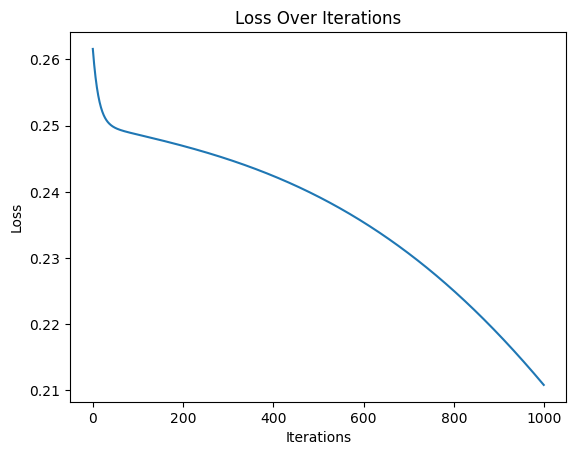

In [42]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros((1, output_dim))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward_propagation(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward_propagation(self, X, y, output):
        delta_output = output - y
        delta_hidden = np.dot(delta_output, self.W2.T) * self.sigmoid_derivative(self.a1)
        
        dW2 = np.dot(self.a1.T, delta_output)
        db2 = np.sum(delta_output, axis=0, keepdims=True)
        dW1 = np.dot(X.T, delta_hidden)
        db1 = np.sum(delta_hidden, axis=0, keepdims=True)
        
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward_propagation(X)
            self.backward_propagation(X, y, output)
            if epoch % 10 == 0:
                loss = np.mean(np.square(y - output))
                print(f'Epoch {epoch}: Loss {loss:.4f}')
    
    def predict(self, X):
        return self.forward_propagation(X)
        
    def accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

input_dim = 10
hidden_dim = 5
output_dim = 1
learning_rate = 0.01
epochs = 200

np.random.seed(0)
X_train = np.random.randn(1000, input_dim)
y_train = np.random.randint(0, 2, (1000, output_dim))

model_scratch = NeuralNetwork(input_dim, hidden_dim, output_dim)
model_scratch.train(X_train, y_train, epochs)

acc = nn.accuracy(X, y)
print("Accuracy:", acc*100)

plt.plot(nn.iteration_history, nn.loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Over Iterations')
plt.show()
